In [1]:
import sys; sys.path.insert(0, "../../"); from utils import *
import numpy as np
import torch

Running Python 3.9.8
You can use npar for np.array


In [2]:
times = np.linspace(0, 10, 256)

### Parametric Burgers discovery results

In [3]:
a, b, c = np.abs(np.array([-1.0028020143508911, -0.24078042805194855, 0.10122136771678925])).tolist()

In [4]:
c

0.10122136771678925

In [5]:
# Clean Exact and clean (x, t) | final_parametric_pinn.pth
ground1 = -0.25*np.sin(times)-1
ground2 = npar([0.1])
est = -b*np.sin(times)-a

In [6]:
err1 = percent_error(est, ground1)
err1

0.507355004248361

In [7]:
err2 = 100*abs(0.1-c)/0.1
err2

1.22136771678924

In [8]:
errs = npar([err1, err2])
errs.mean(), errs.std()

(0.8643613605188005, 0.35700635627043953)

In [9]:
def est_f1(params, domain): return params[1]*np.sin(domain)+params[0]
def est_f2(params, domain): return npar(params[2])

In [10]:
all_params = [[-0.99938607, -0.2458773 ,  0.09999527], 
                [-1.00576413, -0.24115856,  0.0996802 ], 
                [-1.00304902, -0.2355555 ,  0.09983284], 
                [-1.00296175, -0.23732963,  0.09999029], 
                [-1.00088429, -0.24525967,  0.10000382], 
                [-1.00312865, -0.24390902,  0.09959546]]

In [11]:
for params in all_params:
    est1 = est_f1(params, times)
    est2 = est_f2(params, times)
    
    errs = npar([percent_error(est1, ground1), percent_error(est2, ground2)])

    print(errs.mean(), errs.std())

0.13238040885283534 0.127650408852827
0.42498524449821146 0.10518524449820249
0.483865719137908 0.31670571913790846
0.3549488474336648 0.3452388474336548
0.13378263299909132 0.1299626329991036
0.375037565631503 0.029502434368505803


In [12]:
# plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.style.use('science')
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

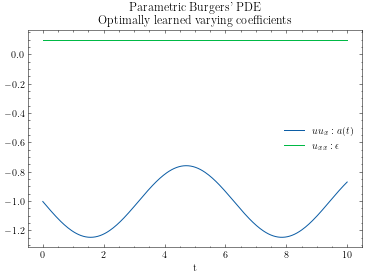

In [13]:
xs = times
plt.figure(figsize=(6, 4))
plt.title("Parametric Burgers' PDE\n Optimally learned varying coefficients")
plt.plot(xs, est_f1(all_params[5], xs), label="$uu_{x}: a(t)$")
plt.plot(xs, [est_f2(all_params[5], xs).tolist() for _ in range(len(xs))], label="$u_{xx}: \epsilon$")
plt.xlabel('t')
plt.legend(loc="best")
plt.savefig(f"../vis_pics/Learned_Coefficients_noisy2.png", dpi=300)
plt.show()